In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import stanza
from spellchecker import SpellChecker
from nltk.corpus import words
import zemberek
from zemberek.morphology import TurkishMorphology
from zemberek.tokenization import TurkishTokenizer
from zemberek.normalization import TurkishSpellChecker
from zemberek.normalization import  TurkishSentenceNormalizer
import jpype
import jpype.imports
from jpype.types import JString

c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# READ DATA

In [3]:
df = pd.read_csv('tweets.csv')
df.head()

,timestamp,username,handle,tweet_date,content
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @OguzhanUgur\n hepinizden Alla...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",Allahım nolur sen onlara dayanma gücü ver #deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",Replying to \n@haluklevent\n @danlabilic\n and...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",Tuğba södekoğlu kovulsun \n@showtv\n #deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",ARKADAŞIMIZA ULAŞAMIYORUZ\nKahramanmaraş Elbis...


# CHECK DATA

In [4]:
def checkData(data):
    print("****************SHAPE****************")
    print(data.shape)
    print("****************COLUMNS****************")
    print(data.columns)
    print("****************DTYPES****************")
    print(data.dtypes)    
    print("****************HEAD****************")
    print(data.head())
    print("****************Tail****************")
    print(data.tail())
    print("****************NA****************")
    print(data.isnull().sum())
    print("****************INFO****************")
    print(data.info())

checkData(df)

****************SHAPE****************
(2676, 5)
****************COLUMNS****************
Index(['timestamp', 'username', 'handle', 'tweet_date', 'content'], dtype='object')
****************DTYPES****************
timestamp     object
username      object
handle        object
tweet_date    object
content       object
dtype: object
****************HEAD****************
             timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan Şevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ŞEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧     dryghtn2  Feb 8, 2023   

                                             content  
0  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...  
1  Allahım nolur sen onlara dayanma gücü ver #deprem  
2  Replying to \n@haluklevent\n @danlabilic\n and...  
3       Tuğba södekoğl

# Tweets Lower And Conver Str

In [7]:
df['content'] = df['content'].astype(str)
df['content'] = df['content'].str.lower()

# Count By Tweet Date

In [8]:
tweet_counts = df.groupby('tweet_date')['content'].count().sort_values(ascending=False)
print("=== Tweet Counts by Date ===")
print(tweet_counts)

=== Tweet Counts by Date ===
tweet_date
Feb 10, 2023    1129
Feb 7, 2023      563
Feb 8, 2023      477
Feb 9, 2023      455
Feb 6, 2023       50
Name: content, dtype: int64


# Hastags

In [9]:
hashtag_counts = df['content'].str.findall(r'#\w+').explode().value_counts()
print("=== Hashtag Counts ===")
print(hashtag_counts)

=== Hashtag Counts ===
content
#deprem                  2686
#hatay                    402
#depremsondakika          193
#hatayyardimbekliyor      193
#afad                     145
                         ... 
#şeytan                     1
#abdgemisiistemiyoruz       1
#arkadaslar                 1
#liberal                    1
#coğrafyadersi              1
Name: count, Length: 767, dtype: int64


# Word Cloud

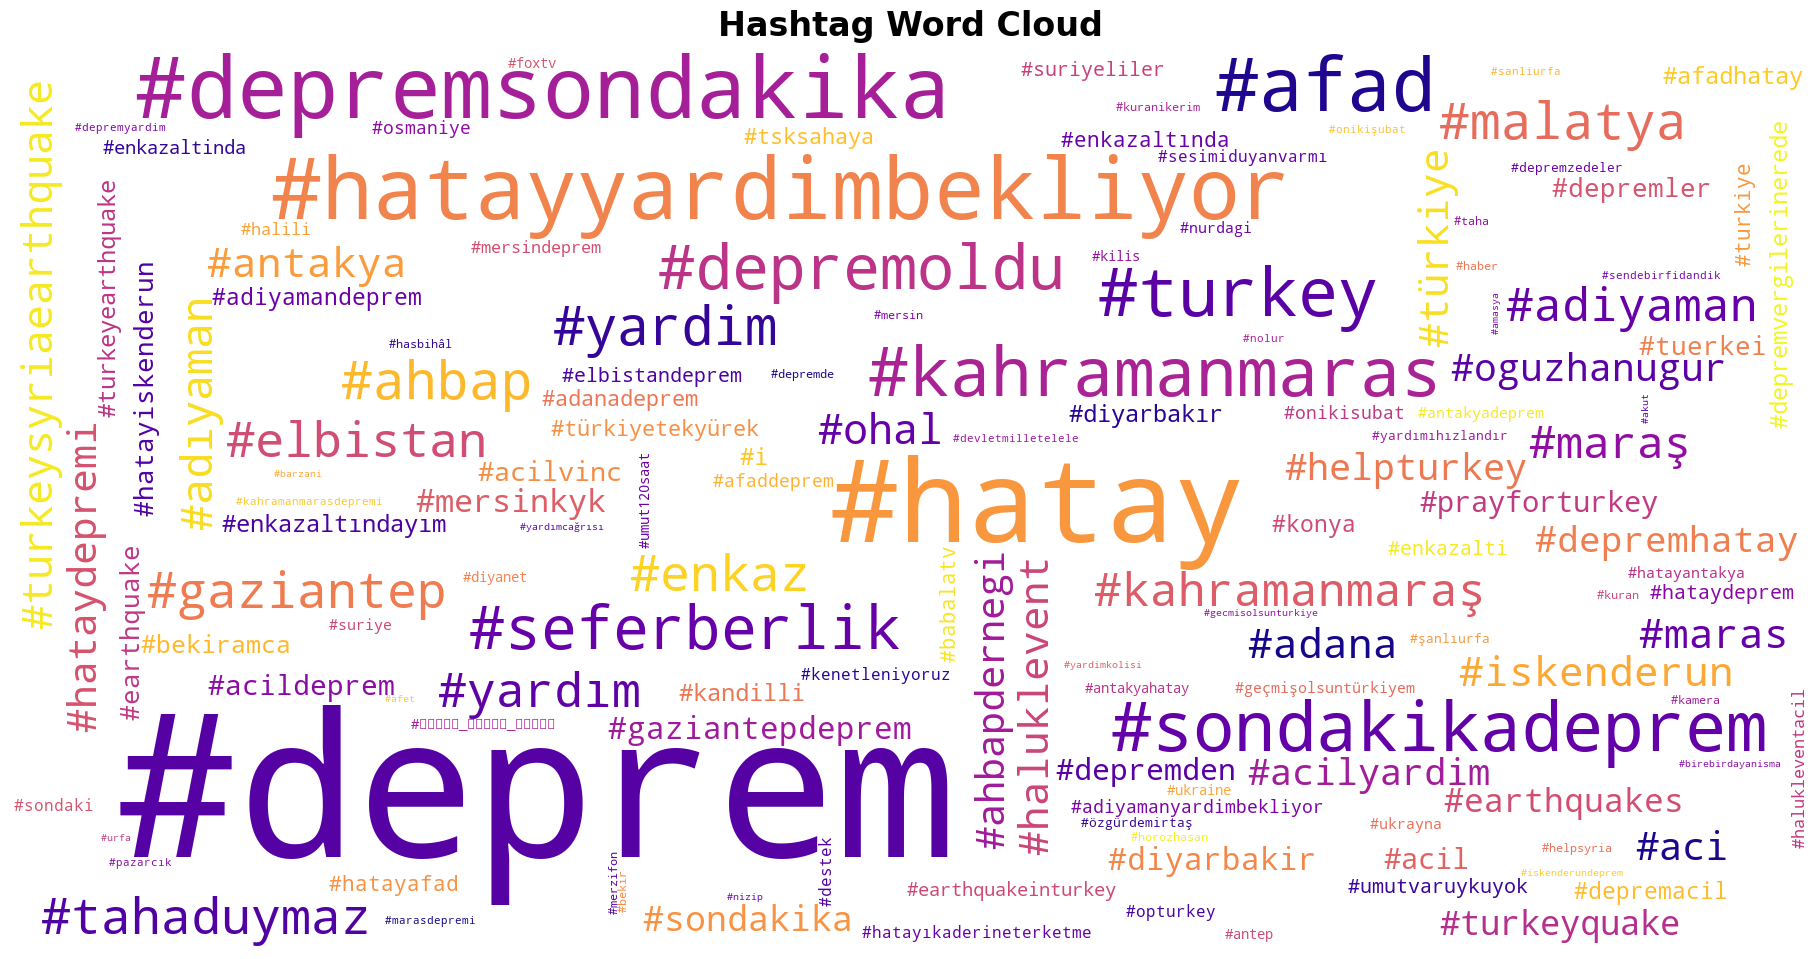

In [10]:
hashtag_dict = hashtag_counts.to_dict()
wordcloud = WordCloud(
    width=1800,
    height=900,
    background_color='white',       
    min_font_size=10,
    max_font_size=200,
    colormap='plasma',              
    contour_color='steelblue',       
    contour_width=1.5               
).generate_from_frequencies(hashtag_dict)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=24, fontweight='bold', pad=10)
plt.tight_layout(pad=0)
plt.show()